In [1]:
import glob
import re

from matplotlib import pyplot as plt
from math import sqrt
import numpy as np

from utils import Graph

The below imports and processes all files used in GAr amplification. The electric field LUT used gives a $h = 200$ $\mu$m, $r = 100$ $\mu$m cylindrical volume surrounding a $3.5$ mm high, $1$ $\mu$m radius tip. At each bulk field (given in $folder\_list$ below), $1000$ simulations were run at each of the three investigated pressures.

In [2]:
folder_list = [10, 13, 17, 23, 30, 40, 53, 70, 93, 123, 162, 214, 283, 375, 496, 655, 866, 1145, 1513, 2000]
P_v = [2, 7, 15]

v_per_cm = [[], [], []]
mult_factor = [[], [], []]

for i, p in enumerate(P_v):
    for folder in folder_list:
        file_tree = {}

        for file in glob.glob(f'gar-amplification/{p}/{folder}/*.txt'):
            key = int(re.search(r'(\d*)(?:V)', file).group(1))
            if (key in file_tree):
                file_tree[key].append(file)
            else:
                file_tree[key] = [file]

        for key, value in sorted(file_tree.items()):
            group = Graph(value, smooth=False)

            ionization_list = []
            
            for k in range(group.n):
                ionization_list.append(group.ionized[k][-1])
            
            multiplication_factor = 2**np.mean(ionization_list)

            v_per_cm[i].append(key)
            mult_factor[i].append(multiplication_factor)

The cell below plots the processed data. The dotted black line shows real world data taken from D. Caratelli's slides: https://kicp-workshops.uchicago.edu/2018-CEvNS/presentations.php.

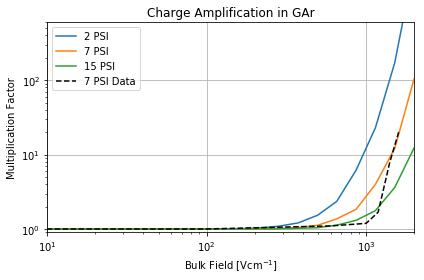

In [3]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(12, 6))

for i, p in enumerate(P_v):
    if p == 2:
        plt.plot(v_per_cm[i], mult_factor[i], label=f'{p} PSI')
    else:
        plt.plot(v_per_cm[i], mult_factor[i], label=f'{p} PSI')
    
plt.plot([1, 1e2, 6e2, 1e3, 1.19e3, 1.41e3, 1.6e3], [1, 1, 1.1, 1.19, 1.68, 8, 20], 'k--', label='7 PSI Data')

plt.title('Charge Amplification in GAr') # with $1$ $\mu$m Radius Tip
plt.xlabel("Bulk Field [Vcm$^{-1}$]")
plt.ylabel("Multiplication Factor")

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e1, 2e3)
plt.ylim(0.9, 6e2)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()    

# plt.savefig('gar_charge_amp.pdf', bbox_inches='tight')